#### Introduction

There have been lot of studies undertaken in the past on factors affecting life expectancy considering demographic variables, income composition and mortality rates. This study will focus on immunization factors, mortality factors, economic factors, social factors and other health related factors as well that relate to life expectancy. Since the observations this dataset are based on different countries, it will be easier for a country to determine the predicting factor which is contributing to lower value of life expectancy. This will help in suggesting a country which area should be given importance in order to efficiently improve the life expectancy of its population.

#### Importing important libraries

In [59]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

#### Reading the dataset into a Pandas Dataframe Object


In [60]:
data = pd.read_csv("Life_Expectancy_Data.csv")

#### taking a quick look at what the data looks like:

In [61]:
data.head()

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,HIV_AIDS,GDP,population,thinness_1_19 years,thinness_5_9_years,Income_composition_of_resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


#### Since Status is Categorical ordinal, we can replace it with numerical distinct values.
We use Dataframe.replace() for that.

In [62]:
data.replace(['Developing', 'Developed'], [0, 1], inplace=True)
data.head()

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,HIV_AIDS,GDP,population,thinness_1_19 years,thinness_5_9_years,Income_composition_of_resources,schooling
0,Afghanistan,2015,0,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,0,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,0,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,0,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,0,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


#### Performing data cleaning


Getting a look of the number of null values in the dataset. We will use isnull().sum() for that as it will count the number of null values in each column. 

In [63]:
data.isnull().sum()


country                              0
year                                 0
status                               0
life_expectancy                     10
adult_mortality                     10
infant_deaths                        0
alcohol                            194
percentage_expenditure               0
hepatitis_b                        553
measles                              0
bmi                                 34
under_five_deaths                    0
polio                               19
total_expenditure                  226
diphtheria                          19
HIV_AIDS                             0
GDP                                448
population                         652
thinness_1_19 years                 34
thinness_5_9_years                  34
Income_composition_of_resources    167
schooling                          163
dtype: int64

Replacing null values with the mean. For that we calculate the mean of all columns and use `fillna()` function to replace all null occurances with the mean. 

In [64]:
def replace_with_mean(s):
    if s != 'country':
        mean = data[s].mean()
        data[s].fillna(mean, inplace=True)

for column in data.columns:
    replace_with_mean(column)


Now our data doesn't contain any null value

In [65]:
data.isnull().sum()

country                            0
year                               0
status                             0
life_expectancy                    0
adult_mortality                    0
infant_deaths                      0
alcohol                            0
percentage_expenditure             0
hepatitis_b                        0
measles                            0
bmi                                0
under_five_deaths                  0
polio                              0
total_expenditure                  0
diphtheria                         0
HIV_AIDS                           0
GDP                                0
population                         0
thinness_1_19 years                0
thinness_5_9_years                 0
Income_composition_of_resources    0
schooling                          0
dtype: int64

#### Getting general information about the dataset

In [66]:
data.describe()

,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,...,polio,total_expenditure,diphtheria,HIV_AIDS,GDP,population,thinness_1_19 years,thinness_5_9_years,Income_composition_of_resources,schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,...,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000
mean,2007.518720,0.174268,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,...,82.550188,5.938190,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,0.379405,9.507640,124.080302,117.926501,3.916288,1987.914858,22.586855,11467.272489,19.927677,...,23.352143,2.400274,23.640073,5.077785,13136.800417,5.381546e+07,4.394535,4.482708,0.204820,3.264381
min,2000.000000,0.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,...,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,0.000000,63.200000,74.000000,0.000000,1.092500,4.685343,80.940461,0.000000,19.400000,...,78.000000,4.370000,78.000000,0.100000,580.486996,4.189172e+05,1.600000,1.600000,0.504250,10.300000
50%,2008.000000,0.000000,72.000000,144.000000,3.000000,4.160000,64.912906,87.000000,17.000000,43.000000,...,93.000000,5.938190,93.000000,0.100000,3116.561755,3.675929e+06,3.400000,3.400000,0.662000,12.100000
75%,2012.000000,0.000000,75.600000,227.000000,22.000000,7.390000,441.534144,96.000000,360.250000,56.100000,...,97.000000,7.330000,97.000000,0.800000,7483.158469,1.275338e+07,7.100000,7.200000,0.772000,14.100000
max,2015.000000,1.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,...,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


#### Calculating the correlation matrix of the dataset using `pandas.DataFrame.corr()` function

In [67]:
correlation_matrix = data.corr()
correlation_matrix

,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,...,polio,total_expenditure,diphtheria,HIV_AIDS,GDP,population,thinness_1_19 years,thinness_5_9_years,Income_composition_of_resources,schooling
year,1.000000,-0.001864,0.169623,-0.078861,-0.037415,-0.048168,0.031400,0.089398,-0.082493,0.108327,...,0.093820,0.081860,0.133853,-0.139741,0.093351,0.014951,-0.047592,-0.050627,0.236333,0.203471
status,-0.001864,1.000000,0.481962,-0.315171,-0.112252,0.579371,0.454261,0.095642,-0.076955,0.310873,...,0.220098,0.289985,0.216763,-0.148590,0.445911,-0.041091,-0.367934,-0.366297,0.457302,0.491444
life_expectancy,0.169623,0.481962,1.000000,-0.696359,-0.196535,0.391598,0.381791,0.203771,-0.157574,0.559255,...,0.461574,0.207981,0.475418,-0.556457,0.430493,-0.019638,-0.472162,-0.466629,0.692483,0.715066
adult_mortality,-0.078861,-0.315171,-0.696359,1.000000,0.078747,-0.190408,-0.242814,-0.138591,0.031174,-0.381449,...,-0.272694,-0.110875,-0.273014,0.523727,-0.277053,-0.012501,0.299863,0.305366,-0.440062,-0.435108
infant_deaths,-0.037415,-0.112252,-0.196535,0.078747,1.000000,-0.113812,-0.085612,-0.178783,0.501128,-0.227220,...,-0.170674,-0.126564,-0.175156,0.025231,-0.107109,0.548522,0.465590,0.471228,-0.143663,-0.191757
alcohol,-0.048168,0.579371,0.391598,-0.190408,-0.113812,1.000000,0.339634,0.075447,-0.051055,0.318070,...,0.213744,0.294898,0.215242,-0.048650,0.318591,-0.030765,-0.416946,-0.405881,0.416099,0.497546
percentage_expenditure,0.031400,0.454261,0.381791,-0.242814,-0.085612,0.339634,1.000000,0.011679,-0.056596,0.228537,...,0.147203,0.173414,0.143570,-0.097857,0.888140,-0.024648,-0.251190,-0.252725,0.380374,0.388105
hepatitis_b,0.089398,0.095642,0.203771,-0.138591,-0.178783,0.075447,0.011679,1.000000,-0.090317,0.134929,...,0.408519,0.050084,0.499958,-0.102405,0.062318,-0.109811,-0.105144,-0.108334,0.150992,0.171755
measles,-0.082493,-0.076955,-0.157574,0.031174,0.501128,-0.051055,-0.056596,-0.090317,1.000000,-0.175925,...,-0.136146,-0.104569,-0.141861,0.030899,-0.068060,0.236250,0.224742,0.221007,-0.115764,-0.122609
bmi,0.108327,0.310873,0.559255,-0.381449,-0.227220,0.318070,0.228537,0.134929,-0.175925,1.000000,...,0.282156,0.231814,0.281059,-0.243548,0.276645,-0.063238,-0.532025,-0.538911,0.479837,0.508105


In [68]:
[column for column in data.columns]


['country',
 'year',
 'status',
 'life_expectancy',
 'adult_mortality',
 'infant_deaths',
 'alcohol',
 'percentage_expenditure',
 'hepatitis_b',
 'measles',
 'bmi',
 'under_five_deaths',
 'polio',
 'total_expenditure',
 'diphtheria',
 'HIV_AIDS',
 'GDP',
 'population',
 'thinness_1_19 years',
 'thinness_5_9_years',
 'Income_composition_of_resources',
 'schooling']

In [167]:
data['life_expectancy'].mean()


69.22493169398906

In [168]:
data['life_expectancy'].median()


72.0

In [169]:
data['life_expectancy'].std()


9.507640065084363

<AxesSubplot:>

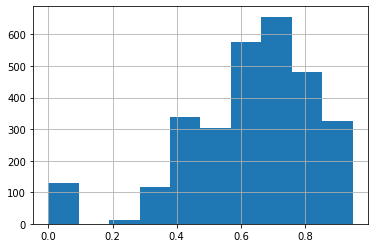

In [72]:
data['Income_composition_of_resources'].hist()


In [73]:
data['Income_composition_of_resources'].max(
) - data['Income_composition_of_resources'].min()


0.948

In [74]:
import matplotlib.pyplot as plt  # matplot library
import seaborn as sns  # seaborn library
%matplotlib inline


In [75]:
#See the correlation between features and our target => Price
income_correlation = data.corr()['life_expectancy']
income_correlation


year                               0.169623
status                             0.481962
life_expectancy                    1.000000
adult_mortality                   -0.696359
infant_deaths                     -0.196535
alcohol                            0.391598
percentage_expenditure             0.381791
hepatitis_b                        0.203771
measles                           -0.157574
bmi                                0.559255
under_five_deaths                 -0.222503
polio                              0.461574
total_expenditure                  0.207981
diphtheria                         0.475418
HIV_AIDS                          -0.556457
GDP                                0.430493
population                        -0.019638
thinness_1_19 years               -0.472162
thinness_5_9_years                -0.466629
Income_composition_of_resources    0.692483
schooling                          0.715066
Name: life_expectancy, dtype: float64

In [76]:
#Use Groupby and Mean to understand the relation Between room_type and price
data[['Income_composition_of_resources','life_expectancy']].groupby(['Income_composition_of_resources'],as_index=False).mean().sort_values(by='life_expectancy',ascending=False)

,Income_composition_of_resources,life_expectancy
575,0.890,85.84
618,0.936,84.38
617,0.934,84.00
610,0.926,84.00
614,0.931,84.00
...,...,...
59,0.357,45.30
88,0.391,44.40
53,0.348,44.30
21,0.302,41.00


/home/omar/ml/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


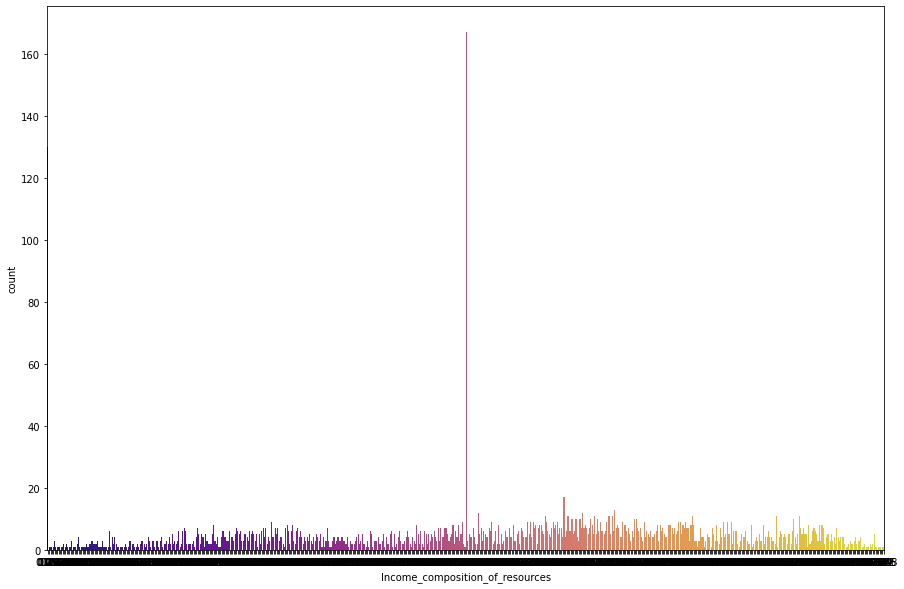

In [77]:
#Seaborn count plot for income. 
plt.figure(figsize=(15, 10))
sns.countplot(data['Income_composition_of_resources'], palette="plasma")
plt.show()


/home/omar/ml/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


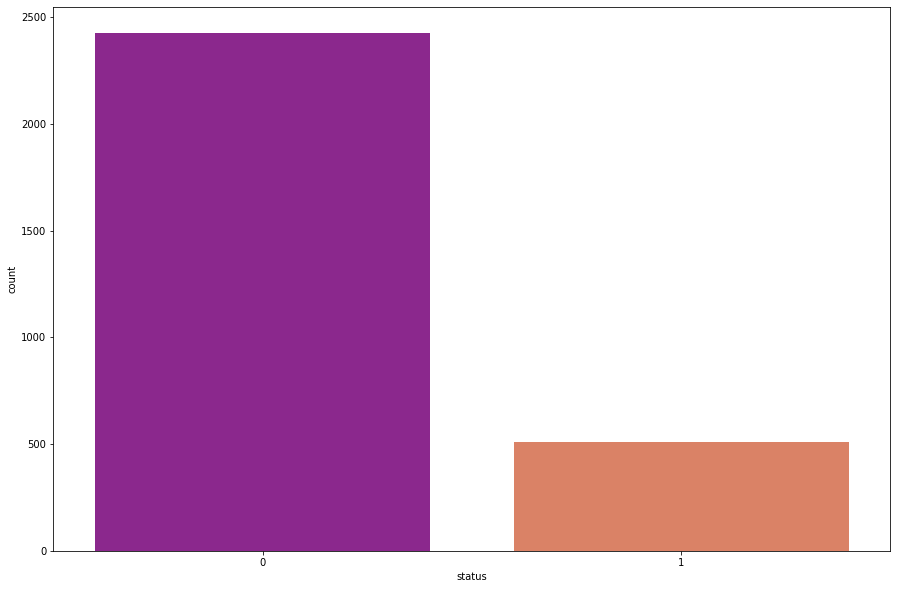

In [78]:
#Seaborn count plot for status.
plt.figure(figsize=(15, 10))
sns.countplot(data['status'], palette="plasma")
plt.show()


/home/omar/ml/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


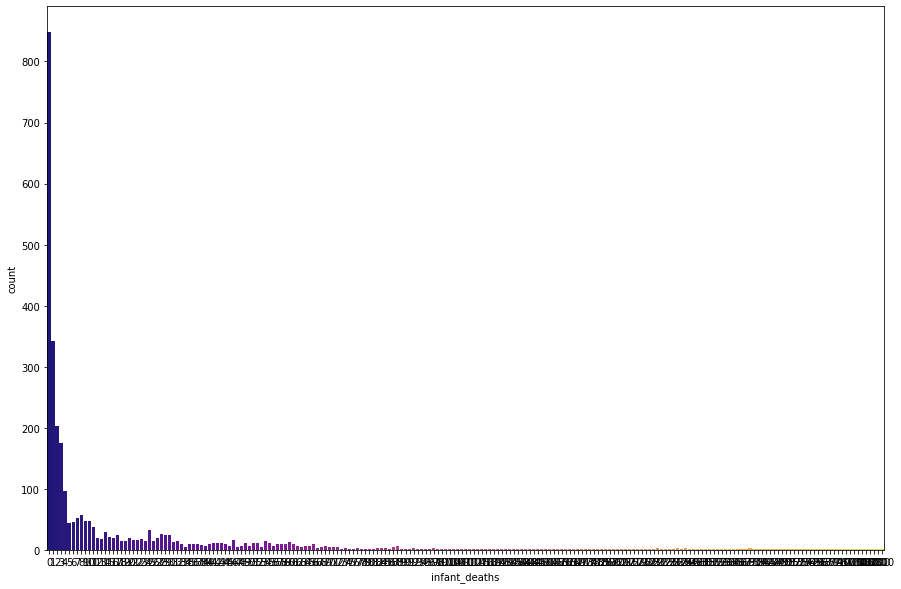

In [79]:
#Seaborn count plot for status.
plt.figure(figsize=(15, 10))
sns.countplot(data['infant_deaths'], palette="plasma")
plt.show()


Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under_five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'HIV_AIDS', 'GDP', 'population', 'thinness_1_19 years',
       'thinness_5_9_years', 'Income_composition_of_resources', 'schooling'],
      dtype='object')

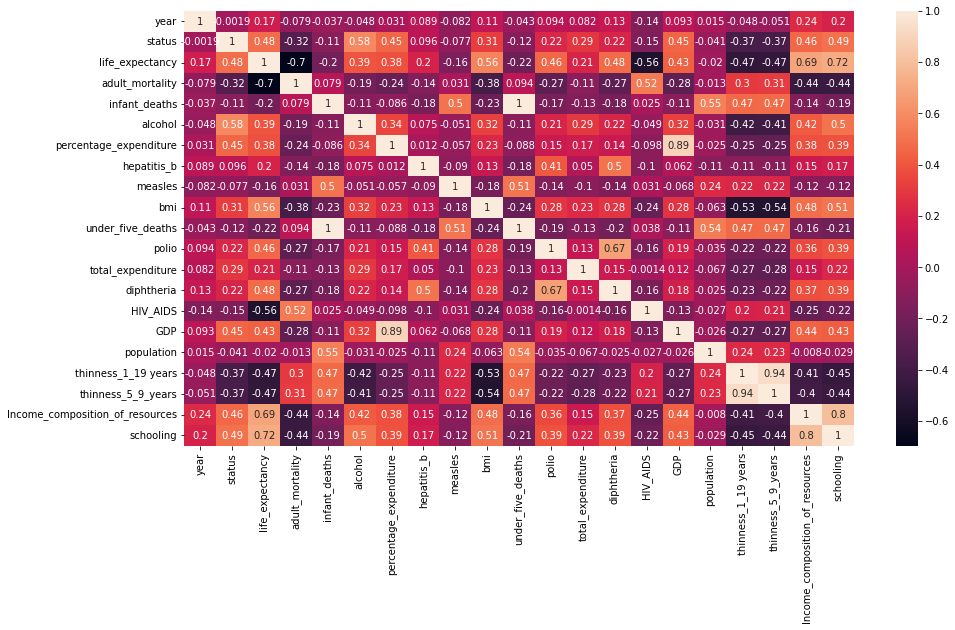

In [80]:
#Seaborn heatmap for the correlation between features
correlation_matrix = data.corr()
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True)
data.columns


In [81]:
data.head()

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,HIV_AIDS,GDP,population,thinness_1_19 years,thinness_5_9_years,Income_composition_of_resources,schooling
0,Afghanistan,2015,0,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,0,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,0,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,0,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,0,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [82]:
data.corr()['life_expectancy']


year                               0.169623
status                             0.481962
life_expectancy                    1.000000
adult_mortality                   -0.696359
infant_deaths                     -0.196535
alcohol                            0.391598
percentage_expenditure             0.381791
hepatitis_b                        0.203771
measles                           -0.157574
bmi                                0.559255
under_five_deaths                 -0.222503
polio                              0.461574
total_expenditure                  0.207981
diphtheria                         0.475418
HIV_AIDS                          -0.556457
GDP                                0.430493
population                        -0.019638
thinness_1_19 years               -0.472162
thinness_5_9_years                -0.466629
Income_composition_of_resources    0.692483
schooling                          0.715066
Name: life_expectancy, dtype: float64

KeyError: 'thinness_1_19_years'

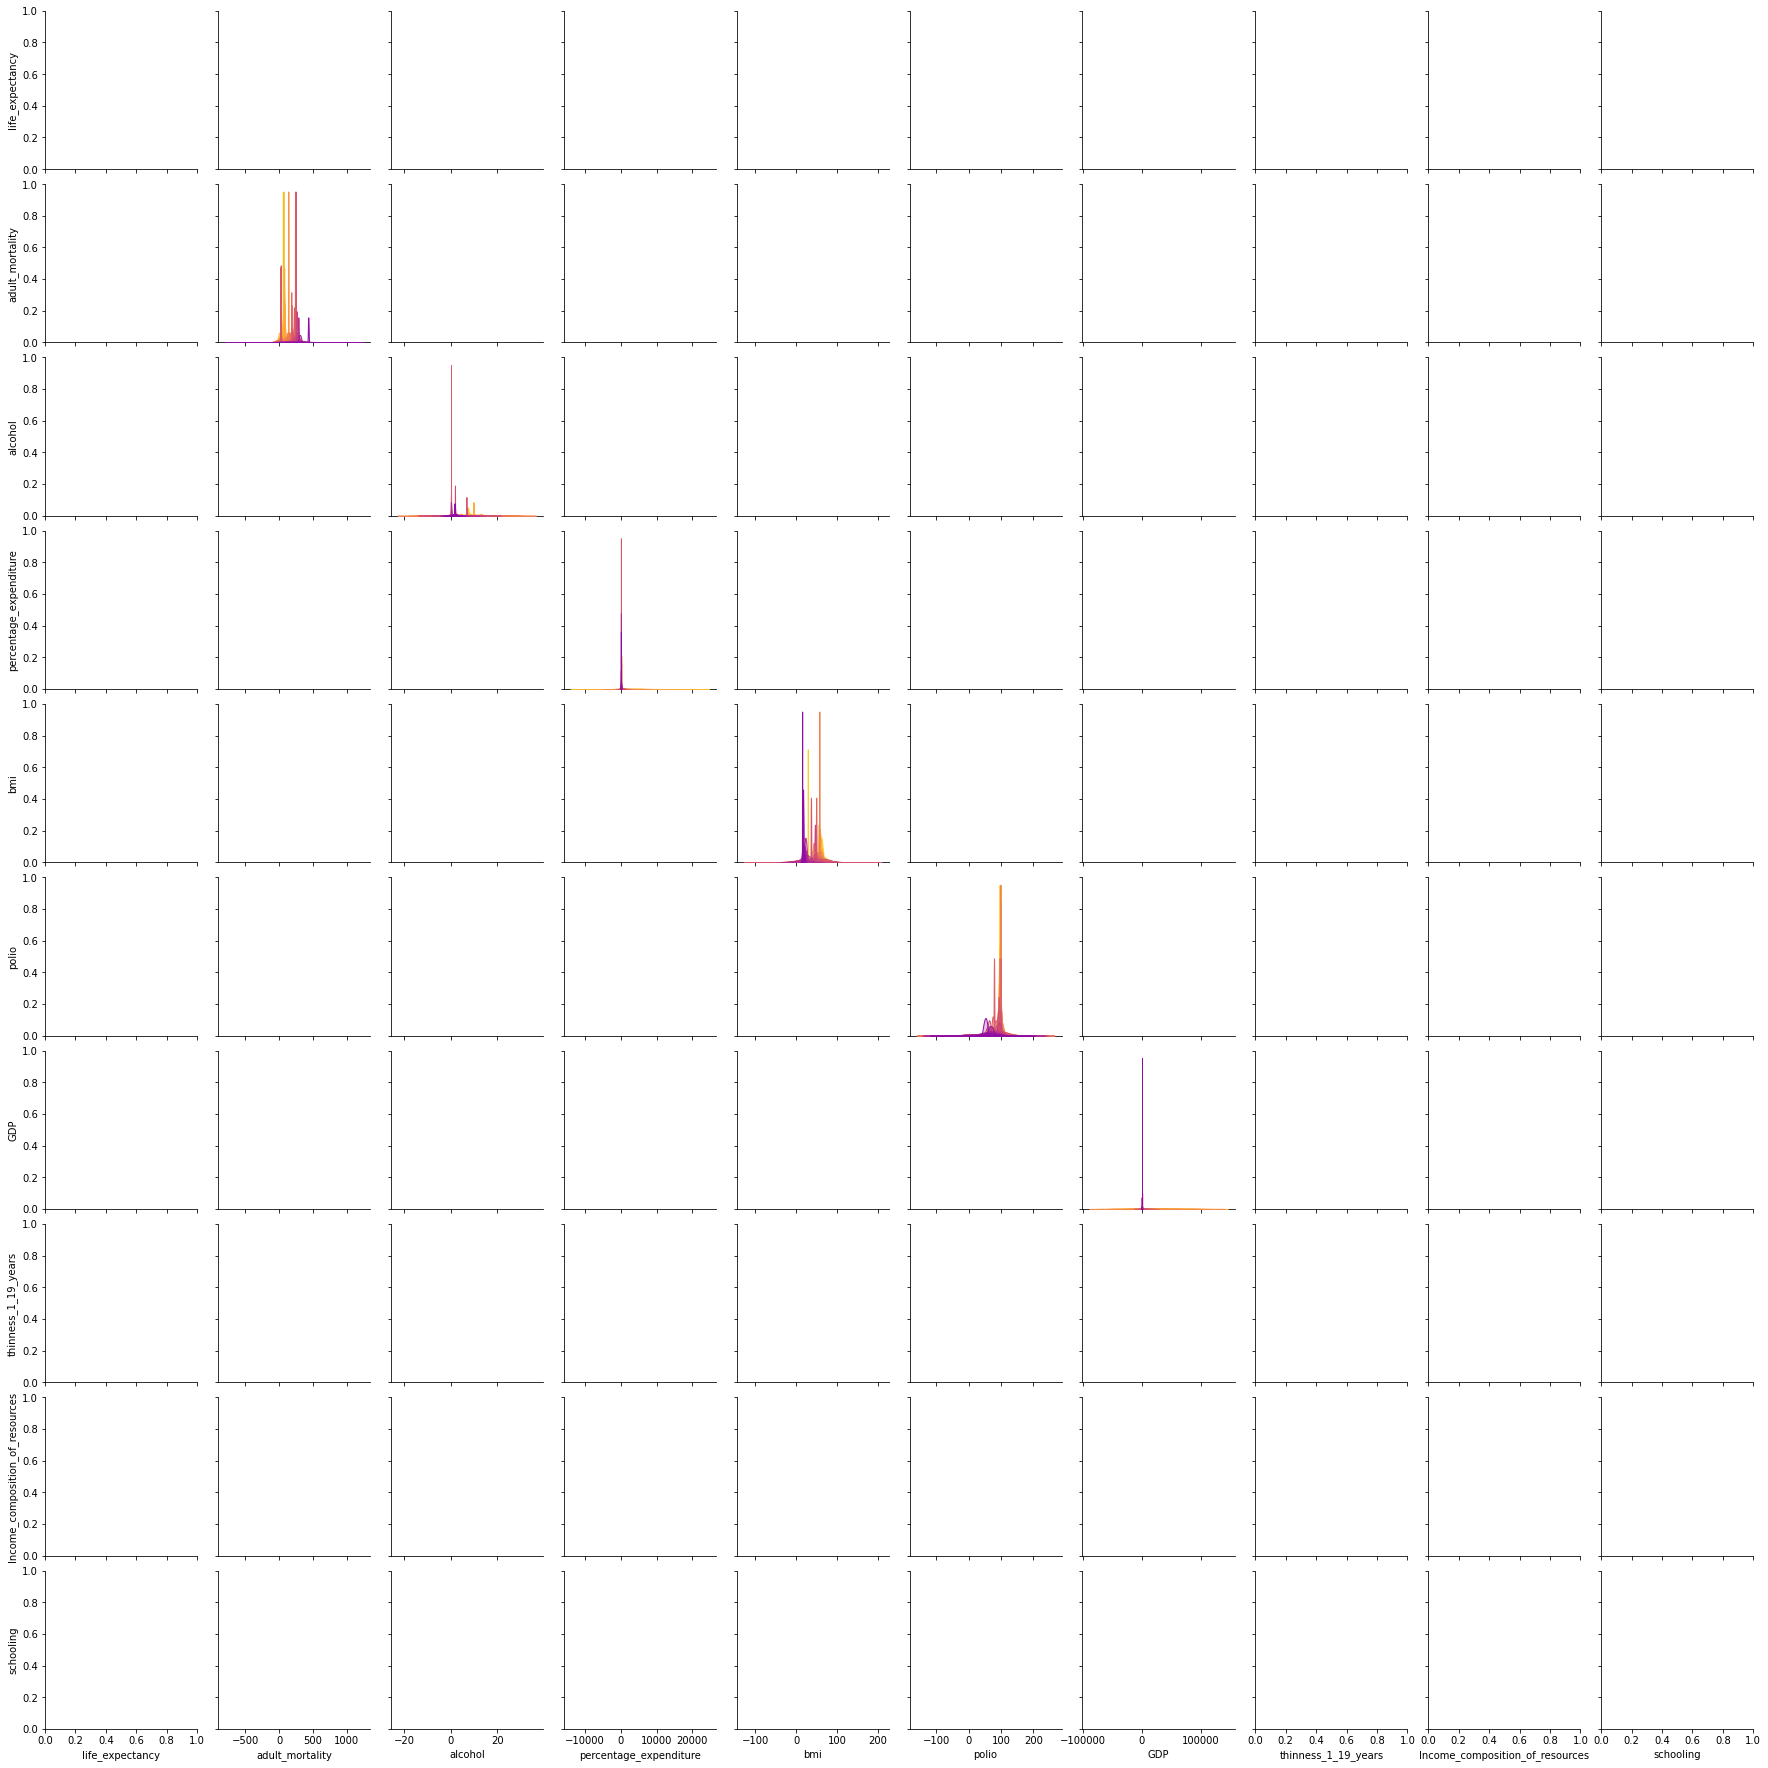

In [83]:
#Seaborn pairplot for correlation of features and Price
sns.pairplot(data[1000:1400].drop(['country', 'year'], axis=1),hue='life_expectancy',palette='plasma', vars=['life_expectancy', 'adult_mortality', 'alcohol', 'percentage_expenditure', 'bmi', 'polio', 'GDP', 'thinness_1_19 years', 'Income_composition_of_resources', 'schooling'])

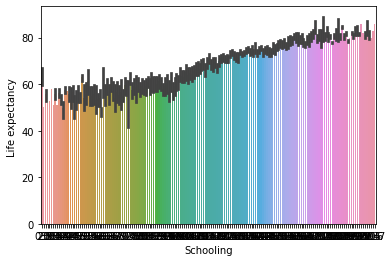

In [ ]:
#Seaborn barplot for room_type and price
sns.barplot(x='schooling', y='life_expectancy', data=data)
plt.show()


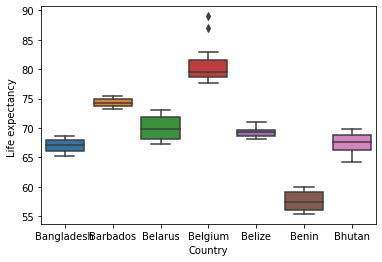

In [ ]:
#Seaborn Boxplot for country and life expectancy
sns.boxplot(x='country', y='life_expectancy', data=data[200:300])
plt.show()

/home/omar/ml/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Schooling', ylabel='Income composition of resources'>

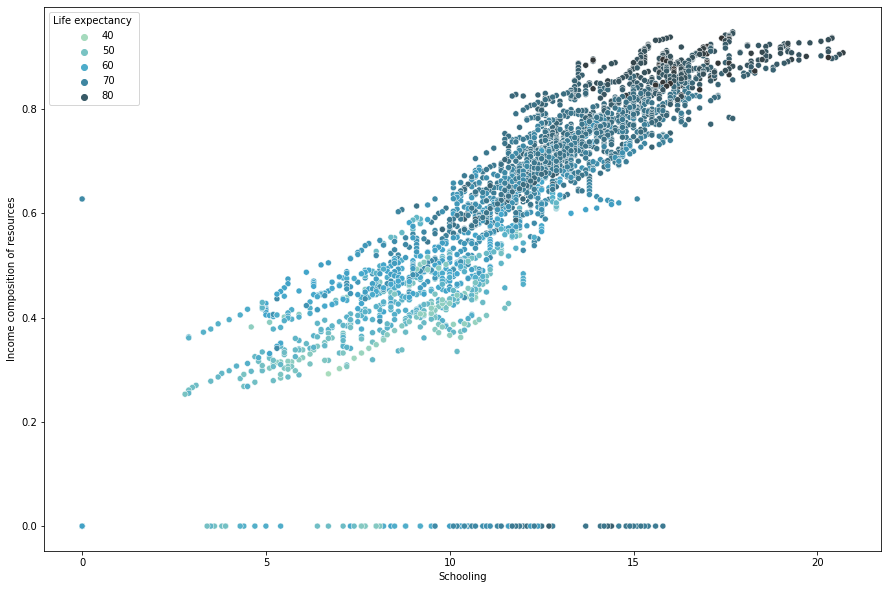

In [ ]:
#Seaborn Scatter plot for Schooling and Income composition of resources with respect to Life expectancy
plt.figure(figsize=(15,10))
sns.scatterplot(data['schooling'],data['Income_composition_of_resources'],hue=data['life_expectancy'],palette='GnBu_d')

In [ ]:
[column for column in data.columns]

['country',
 'year',
 'status',
 'life_expectancy',
 'adult_mortality',
 'infant_deaths',
 'alcohol',
 'percentage_expenditure',
 'hepatitis_b',
 'measles',
 'bmi',
 'under_five_deaths',
 'polio',
 'total_expenditure',
 'diphtheria',
 'HIV_AIDS',
 'GDP',
 'population',
 'thinness_1_19 years',
 'thinness_5_9_years',
 'Income_composition_of_resources',
 'schooling']

In [84]:
data.dtypes

country                             object
year                                 int64
status                               int64
life_expectancy                    float64
adult_mortality                    float64
infant_deaths                        int64
alcohol                            float64
percentage_expenditure             float64
hepatitis_b                        float64
measles                              int64
bmi                                float64
under_five_deaths                    int64
polio                              float64
total_expenditure                  float64
diphtheria                         float64
HIV_AIDS                           float64
GDP                                float64
population                         float64
thinness_1_19 years                float64
thinness_5_9_years                 float64
Income_composition_of_resources    float64
schooling                          float64
dtype: object

In [54]:
data['infant_deaths'].unique()


array([  62,   64,   66,   69,   71,   74,   77,   80,   82,   84,   85,
         87,   88,    0,    1,   21,   20,   19,   67,   72,   75,   78,
         81,   90,   92,   94,   95,   96,   97,    8,    9,   10,   11,
         12,    5,    6,    7,   98,  104,  111,  118,  126,  135,  144,
        154,  164,  174,  185,  196,  207,  219,  231,   25,   13,   14,
         15,    2,   42,   44,   46,   49,   51,   54,   57,   61,   65,
         70,  103,   38,   39,   40,   41,   43,   45,   47,   48,   22,
         23,   24,   58,   59,   60,   63,   16,   17,   18,   27,   50,
         53,   56,  157,  171,  201,  215,  248,  266,  285,  307,  332,
        360,  391,  422,  457,  490,  236,  237,  238,  239,  235,  233,
        232,  229,  227,  226,   55,    3,    4,  136,  140,  145,  150,
        156,  162,  169,  177,  186,  206,  217,  228,  246,  253,   37,
         26,   28,   29,   30,   31,   32,   33,   34,   35,   36,  910,
        957, 1000, 1100, 1200, 1300, 1400, 1500, 16

#### Deep Learning

In [110]:
import tensorflow as tf
# from tensorflow import keras
from tensorflow.keras.layers import Input, Dense, SimpleRNN, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD

from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split


In [120]:
targets = data['life_expectancy'].to_numpy()

features = data.drop(['country', 'life_expectancy'], axis=1)
features = features.to_numpy()

print(features.shape)
print(targets.shape)

(2938, 20)
(2938,)


In [123]:
x_train, x_test, y_train, y_test = train_test_split(
    features, targets, test_size=0.2)
y_train.shape

(2350,)

In [235]:
i = Input(shape=(20,))
x = BatchNormalization()(i)
x = Dense(40, activation='relu')(x)
x = Dense(20, activation='relu')(x)
x = Dense(10, activation='relu')(x)
x = Dense(1)(x)


In [236]:
model = Model(i, x)
model.compile(loss='mean_squared_error',
			  optimizer='nadam', metrics=['mean_squared_error']) #adamax, nadam, sgd

In [237]:
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=80)

Epoch 1/80
74/74 [==============================] - 1s 5ms/step - loss: 4710.5703 - mean_squared_error: 4710.5703 - val_loss: 85920.1953 - val_mean_squared_error: 85920.1953
Epoch 2/80
74/74 [==============================] - 0s 3ms/step - loss: 2183.2590 - mean_squared_error: 2183.2590 - val_loss: 760570.3125 - val_mean_squared_error: 760570.3125
Epoch 3/80
74/74 [==============================] - 0s 3ms/step - loss: 411.6857 - mean_squared_error: 411.6857 - val_loss: 313663.8438 - val_mean_squared_error: 313663.8438
Epoch 4/80
74/74 [==============================] - 0s 3ms/step - loss: 159.5063 - mean_squared_error: 159.5063 - val_loss: 69788.9609 - val_mean_squared_error: 69788.9609
Epoch 5/80
74/74 [==============================] - 0s 3ms/step - loss: 103.8819 - mean_squared_error: 103.8819 - val_loss: 12379.2344 - val_mean_squared_error: 12379.2344
Epoch 6/80
74/74 [==============================] - 0s 3ms/step - loss: 88.7458 - mean_squared_error: 88.7458 - val_loss: 1705.6652 

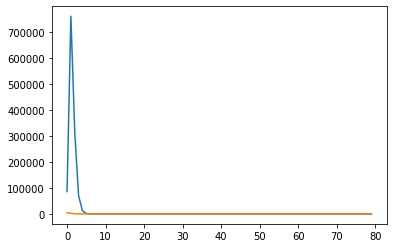

In [238]:
plt.plot(r.history["val_loss"])
plt.plot(r.history["loss"])
plt.show()


In [239]:
model.predict(x_train[10:])

array([[81.014404],
       [60.98654 ],
       [76.05821 ],
       ...,
       [71.18114 ],
       [81.22181 ],
       [70.23276 ]], dtype=float32)

In [233]:
y_train[10:]

array([89. , 61.4, 74.9, ..., 71.8, 88. , 69.4])